<a href="https://colab.research.google.com/github/nabilaaaa24/Machine-Learning/blob/main/ML_Latihan_Modul_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buatlah sebuah model klasifikasi citra dari dataset [ini](https://drive.google.com/file/d/1Ka-Af0WgPI8ulZylax7HSImFbF8nPs8l/view). Dataset ini adalah sebuah dataset citra bunga yang terdapat tiga jenis bunga yaitu daisy, sunflower, dan tulip. Gunakan neural network boleh mirip dengan code materi dan lakukan evaluasi dari model yang sudah dibuat. Setelah itu silakan jelaskan ke asisten tentang model dan hasil evaluasi dari klasifikasi.

# Persiapan Data

In [ ]:
!pip install gdown

import os

# Cek apakah folder sudah ada
if not os.path.exists("Dataset"):
    os.mkdir("Dataset")
    print("Folder 'Dataset' berhasil dibuat.")
else:
    print("Folder 'Dataset' sudah ada.")

Folder 'Dataset' berhasil dibuat.


In [ ]:
!gdown "1Ka-Af0WgPI8ulZylax7HSImFbF8nPs8l" -O "Latihan_Dataset.zip"
!unzip "Latihan_Dataset.zip" -d "Dataset/"

Downloading...
From (original): https://drive.google.com/uc?id=1Ka-Af0WgPI8ulZylax7HSImFbF8nPs8l
From (redirected): https://drive.google.com/uc?id=1Ka-Af0WgPI8ulZylax7HSImFbF8nPs8l&confirm=t&uuid=65abbc58-5875-4210-896b-d3e4051d0fb8
To: /content/Latihan_Dataset.zip
100% 104M/104M [00:02<00:00, 45.4MB/s]
Archive:  Latihan_Dataset.zip
   creating: Dataset/Latihan_Dataset/
   creating: Dataset/Latihan_Dataset/daisy/
  inflating: Dataset/Latihan_Dataset/daisy/10140303196_b88d3d6cec.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10172379554_b296050f82_n.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10172567486_2748826a8b.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10172636503_21bededa75_n.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10391248763_1d16681106_n.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10437754174_22ec990b77_m.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: Dataset/Latihan_Dataset/daisy/10437929963_bc13eebe0c.jpg

## Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pathlib

## Constant Variable

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

IMG_HEIGHT, IMG_WIDTH = 300, 300
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 3
CLASSES = ["daisy", "sunflower", "tulip"]
DATASET_PATH = "./Dataset/Latihan_Dataset"

## Load Data

In [ ]:
data_dir = pathlib.Path(DATASET_PATH)

In [ ]:
# akan dibuat sebuah dataset dengan dua label, yaitu class_a dan class_b
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir, # path dataset
  validation_split=0.2, # jumlah validation data dalam tipe data float 0.0-1.0
  subset="training", # nama subset untuk variable ini, tersedia untuk training dan validation
  seed=123, # menetapkan seed agar dataset bisa kita produksi ulang
  image_size=(IMG_HEIGHT, IMG_WIDTH), # tentukan ukuran citra yang ingin digunakan
  batch_size=BATCH_SIZE, # jumlah batch tiap training
  labels='inferred'
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Alokasi 20% untuk validasi
    subset="validation",  # Subset untuk validasi
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    labels='inferred'  # Label diambil dari folder
)

Found 1603 files belonging to 3 classes.
Using 1283 files for training.
Found 1603 files belonging to 3 classes.
Using 320 files for validation.


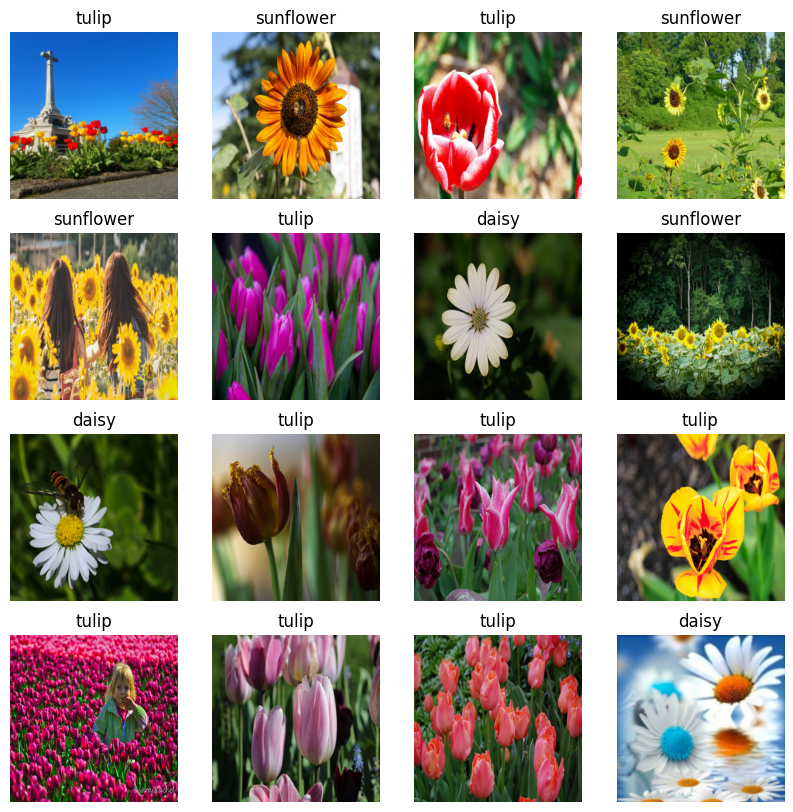

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASSES[labels[i]])
    plt.axis("off")

# Model

## Pembuatan Model

In [ ]:
model = Sequential([
    Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 300, 300, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 298, 298, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      80,282,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,376,899 (306.61 MB)

 Trainable params: 80,376,899 (306.61 MB)

 Non-trainable params: 0 (0.00 B)

## Pelatihan Model

In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_ds)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - accuracy: 0.4145 - loss: 3.2129 - val_accuracy: 0.7156 - val_loss: 0.6861
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.7494 - loss: 0.6394 - val_accuracy: 0.7312 - val_loss: 0.6415
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - accuracy: 0.7429 - loss: 0.6389 - val_accuracy: 0.7906 - val_loss: 0.6024
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 319s 8s/step - accuracy: 0.8078 - loss: 0.4798 - val_accuracy: 0.8062 - val_loss: 0.5587
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.8611 - loss: 0.3908 - val_accuracy: 0.7688 - val_loss: 0.5303
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 314s 8s/step - accuracy: 0.8582 - loss: 0.3982 - val_accuracy: 0.7937 - val_loss: 0.6869
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 323s 8s/step - accuracy: 0.9097 - loss: 0.2381 - val_accuracy: 0.8156 - val_loss: 0.6591
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 342s 8s/step - accuracy: 0.9697 - loss: 0.0914 - val_accuracy: 0.8219 - v

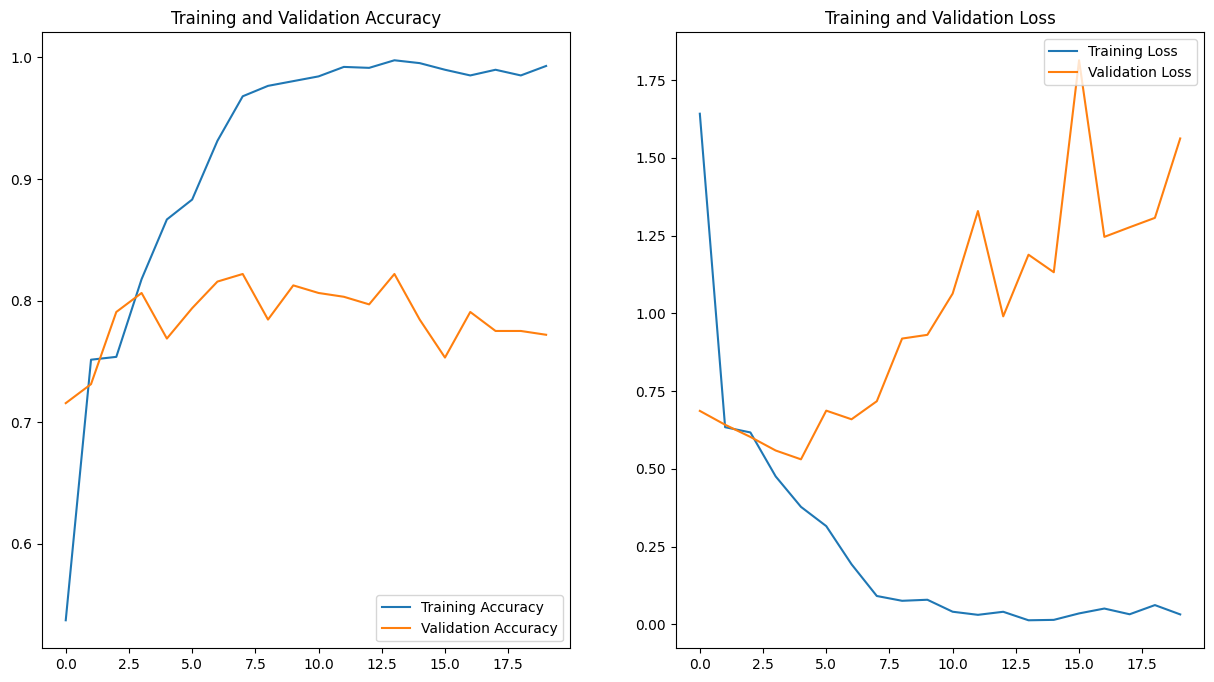

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluasi

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.7710 - loss: 1.5420
Test accuracy : 0.7718750238418579
Test loss : 1.5621354579925537


In [ ]:
y_true = []
y_pred = []

for images, labels in val_ds:
    batch_predictions = model.predict(images)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=CLASSES))

              precision    recall  f1-score   support

       daisy       0.73      0.81      0.77       102
   sunflower       0.87      0.68      0.76        96
       tulip       0.75      0.81      0.78       122

    accuracy                           0.77       320
   macro avg       0.78      0.77      0.77       320
weighted avg       0.78      0.77      0.77       320



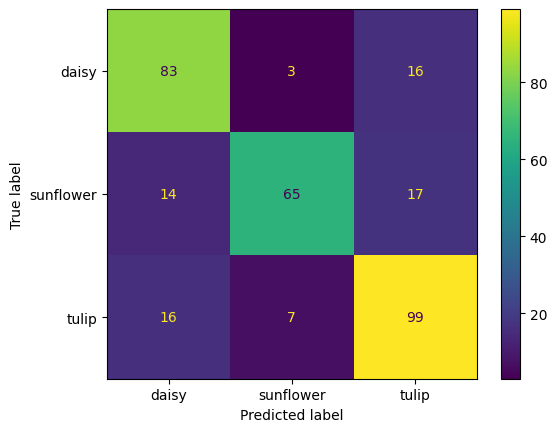

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASSES)
disp.plot()
plt.show()